# Modelo predictivo de Precios de Venta de Inmuebles 

Objetivos:
- Realizar un analisis exploratorio del dataset.
- Determinar las variables que influyen en el precio del inmueble

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccion del DataSet

In [ ]:
data = pd.read_csv(r"D:\desarrollo\club-de-datos\club-de-datos-python\data\db_AMBA.csv", sep=",")

data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


# Analisis Exploratorio

In [ ]:

print("Columnas Originales:")
print(data.columns)

data.columns = ['fecha_inicio', 'fecha_fin', 'fecha_creacion', 'lat', 'lon', 'pais', 'provincia', 'ciudad',
 'ambientes', 'dormitorios', 'baños', 'superficie_total', 'superficie_cubierta',
 'precio', 'moneda', 'titulo', 'descripcion', 'tipo_propiedad', 'tipo_operacion']

print("Columnas nuevas:")
print(data.columns)

print("Columnas: ", data.shape[1], "\nFilas:", data.shape[0])

Index(['Columnas Originales :\nfecha_inicio',
       'Columnas Originales :\nfecha_fin',
       'Columnas Originales :\nfecha_creacion', 'Columnas Originales :\nlat',
       'Columnas Originales :\nlon', 'Columnas Originales :\npais',
       'Columnas Originales :\nprovincia', 'Columnas Originales :\nciudad',
       'Columnas Originales :\nambientes',
       'Columnas Originales :\ndormitorios', 'Columnas Originales :\nbaños',
       'Columnas Originales :\nsuperficie_total',
       'Columnas Originales :\nsuperficie_cubierta',
       'Columnas Originales :\nprecio', 'Columnas Originales :\nmoneda',
       'Columnas Originales :\ntitulo', 'Columnas Originales :\ndescripcion',
       'Columnas Originales :\ntipo_propiedad',
       'Columnas Originales :\ntipo_operacion'],
      dtype='object')
Index(['fecha_inicio', 'fecha_fin', 'fecha_creacion', 'lat', 'lon', 'pais',
       'provincia', 'ciudad', 'ambientes', 'dormitorios', 'baños',
       'superficie_total', 'superficie_cubierta', 'pr

In [4]:

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fecha_inicio         146660 non-null  object 
 1   fecha_fin            146660 non-null  object 
 2   fecha_creacion       146660 non-null  object 
 3   lat                  136735 non-null  float64
 4   lon                  136701 non-null  float64
 5   pais                 146660 non-null  object 
 6   provincia            146660 non-null  object 
 7   ciudad               146660 non-null  object 
 8   ambientes            146660 non-null  float64
 9   dormitorios          146660 non-null  float64
 10  baños                140703 non-null  float64
 11  superficie_total     126133 non-null  float64
 12  superficie_cubierta  125046 non-null  float64
 13  precio               146660 non-null  float64
 14  moneda               146660 non-null  object 
 15  titulo           

In [5]:
data.isnull().sum()

fecha_inicio               0
fecha_fin                  0
fecha_creacion             0
lat                     9925
lon                     9959
pais                       0
provincia                  0
ciudad                     0
ambientes                  0
dormitorios                0
baños                   5957
superficie_total       20527
superficie_cubierta    21614
precio                     0
moneda                     0
titulo                     0
descripcion                0
tipo_propiedad             0
tipo_operacion             0
dtype: int64

In [ ]:
data = data.dropna(subset=['superficie_cubierta', 'superficie_total', 'baños'])


In [6]:
data.describe()

,lat,lon,ambientes,dormitorios,baños,superficie_total,superficie_cubierta,precio
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


In [7]:
data.corr(numeric_only=True)

,lat,lon,ambientes,dormitorios,baños,superficie_total,superficie_cubierta,precio
lat,1.000000,-0.975578,-0.010933,0.007618,0.019923,-0.019598,-0.004156,0.013393
lon,-0.975578,1.000000,-0.006931,-0.016905,-0.028612,-0.049097,-0.014388,0.009368
ambientes,-0.010933,-0.006931,1.000000,0.869769,0.613308,0.081044,0.075012,0.351025
dormitorios,0.007618,-0.016905,0.869769,1.000000,0.588527,0.079229,0.072627,0.316192
baños,0.019923,-0.028612,0.613308,0.588527,1.000000,0.061159,0.069361,0.556861
superficie_total,-0.019598,-0.049097,0.081044,0.079229,0.061159,1.000000,0.430887,0.038727
superficie_cubierta,-0.004156,-0.014388,0.075012,0.072627,0.069361,0.430887,1.000000,0.049136
precio,0.013393,0.009368,0.351025,0.316192,0.556861,0.038727,0.049136,1.000000


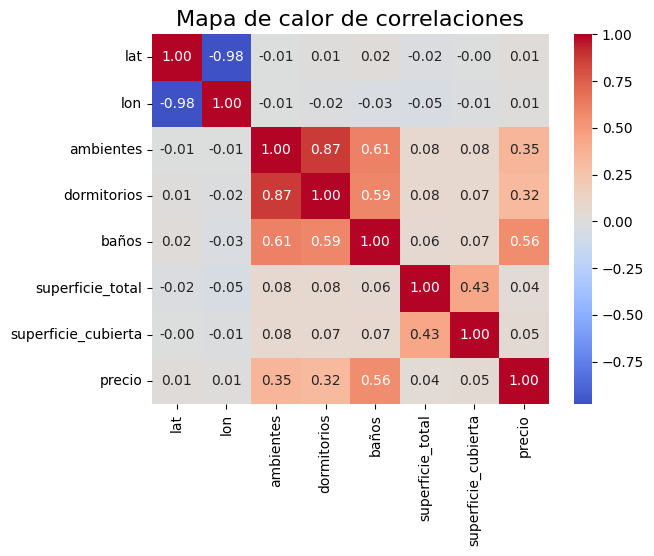

In [13]:
plt.figure()
sns.heatmap(data.corr(numeric_only=True),  
            annot=True, 
            cmap="coolwarm", 
            center=0, 
            fmt=".2f")

plt.title("Mapa de calor de correlaciones", fontsize=16)
plt.show()

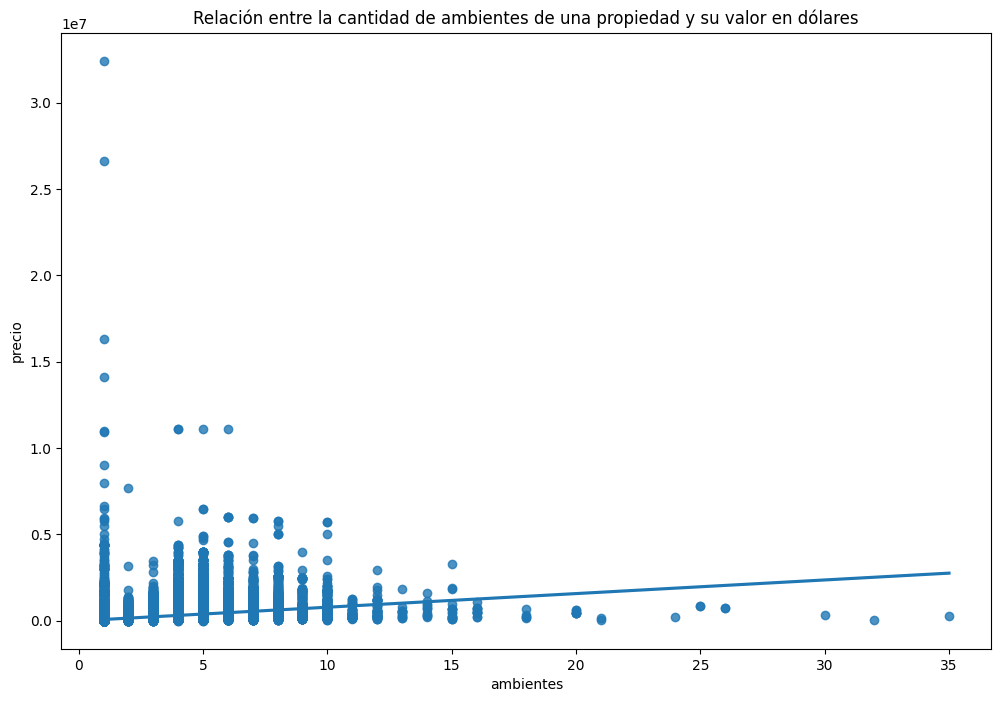

In [17]:
plt.figure(figsize=(12,8))
sns.regplot(x="ambientes",y="precio",data=data[["ambientes", "precio"]])
plt.title("Relación entre la cantidad de ambientes de una propiedad y su valor en dólares")
plt.show()

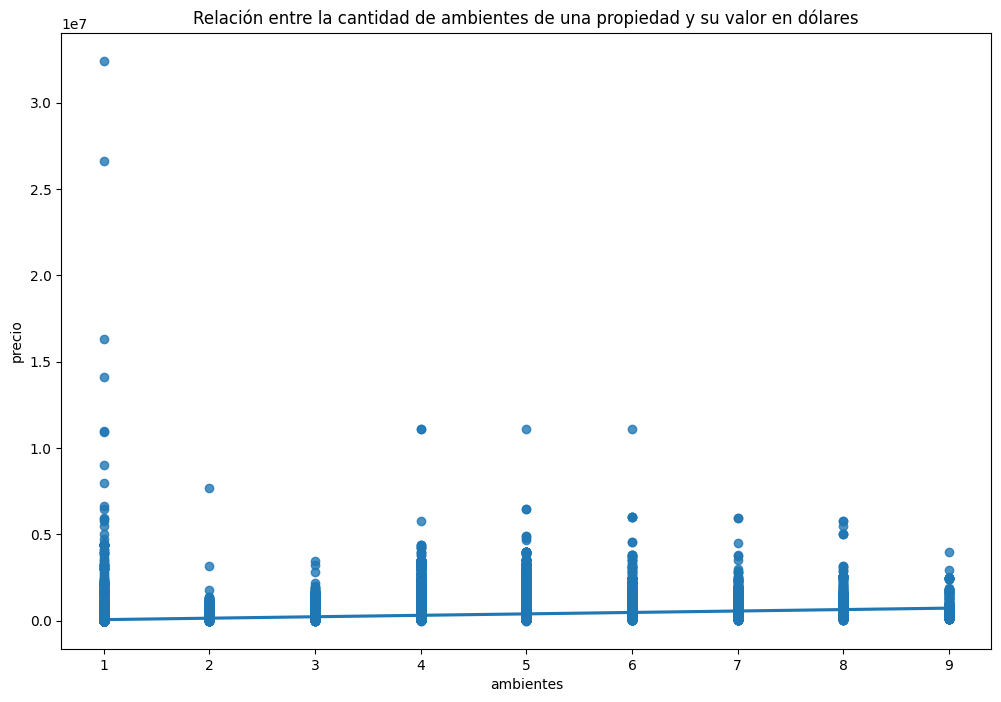

In [19]:
df = data[(data["ambientes"] < 10)]

plt.figure(figsize=(12,8))
sns.regplot(x="ambientes",y="precio",data=df[["ambientes", "precio"]])
plt.title("Relación entre la cantidad de ambientes de una propiedad y su valor en dólares")
plt.show()

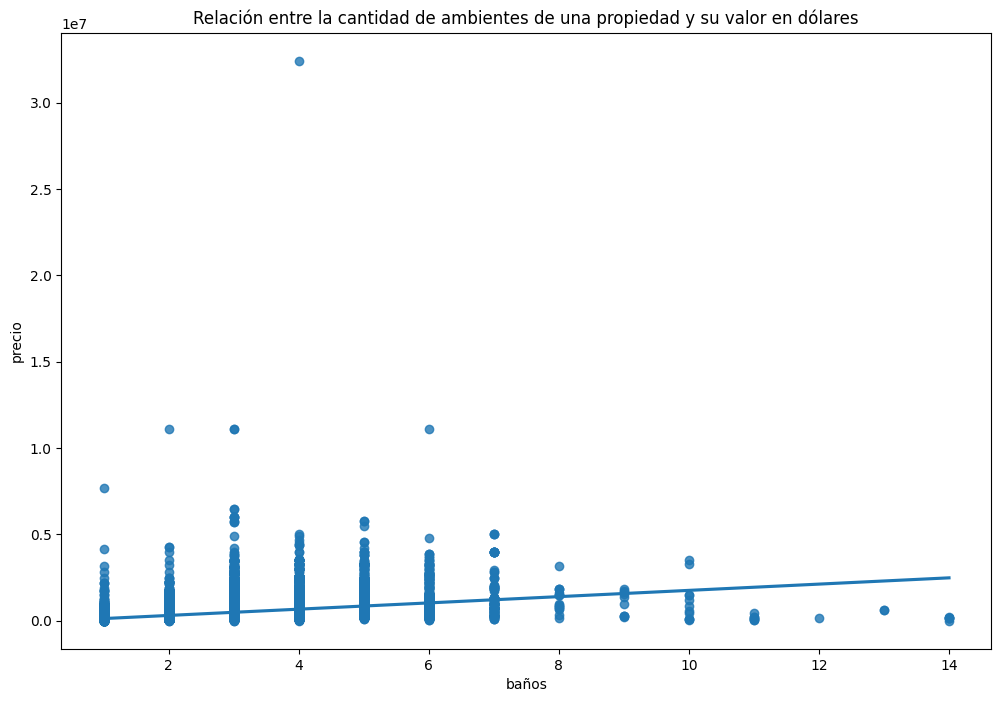

In [21]:
plt.figure(figsize=(12,8))
sns.regplot(x="baños",y="precio",data=data[["baños", "precio"]])
plt.title("Relación entre la cantidad de ambientes de una propiedad y su valor en dólares")
plt.show()

In [26]:
data["ciudad"].unique()


array(['San Cristobal', 'Boedo', 'Palermo', 'La Plata', 'Villa Crespo',
       'Parque Patricios', 'Villa Pueyrredón', 'Pilar', 'Tigre', 'Abasto',
       'Flores', 'Morón', 'Nuñez', 'Almagro', 'Belgrano', 'Floresta',
       'Recoleta', 'Balvanera', 'Caballito', 'Chacarita', 'San Telmo',
       'Colegiales', 'La Matanza', 'San Isidro', 'San Miguel',
       'Villa Luro', 'Barrio Norte', 'Las Cañitas', 'San Nicolás',
       'Villa Urquiza', 'Vicente López', 'Parque Centenario',
       'General San Martín', 'Villa General Mitre', 'Lanús', 'Ituzaingó',
       'Boca', 'Once', 'Retiro', 'Monserrat', 'Avellaneda',
       'San Fernando', 'Puerto Madero', 'Villa Ortuzar',
       'Parque Chacabuco', 'Centro / Microcentro', 'Tres de Febrero',
       'Liniers', 'Coghlan', 'Congreso', 'Paternal', 'Saavedra',
       'Villa Santa Rita', 'Barracas', 'Villa Lugano', 'Constitución',
       'Mataderos', 'Villa Devoto', 'Parque Avellaneda',
       'Villa del Parque', 'Esteban Echeverría', 'Lomas de Zamora'

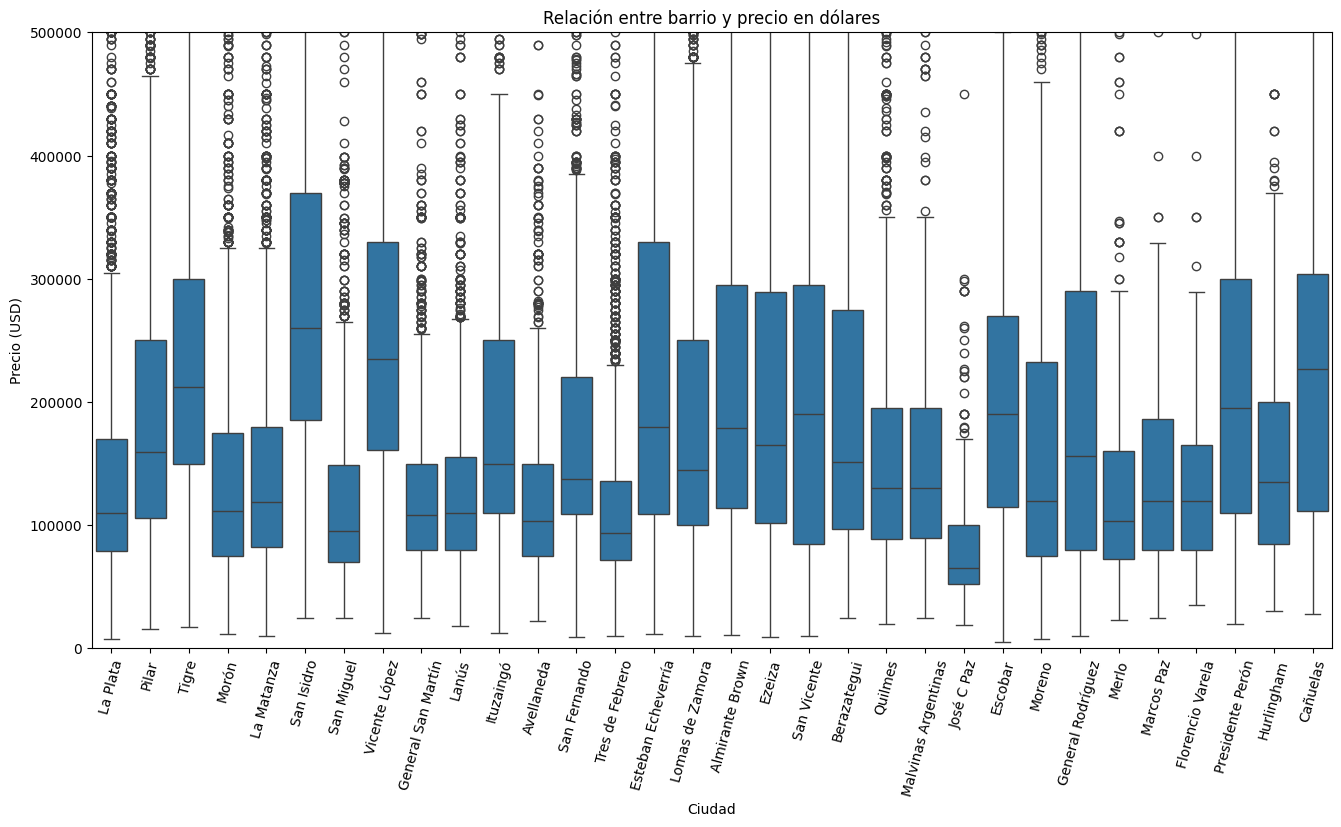

In [39]:
# Agrupar por ciudad y calcular promedio
df_media_ciudad = data.groupby("ciudad")["precio"].mean().sort_values(ascending=True)

# Lista de ciudades de interés
caba = [
    'San Cristobal', 'Boedo', 'Palermo', 'Villa Crespo', 'Parque Patricios',
    'Villa Pueyrredón', 'Abasto', 'Flores', 'Nuñez', 'Almagro', 'Belgrano',
    'Floresta', 'Recoleta', 'Balvanera', 'Caballito', 'Chacarita', 'San Telmo',
    'Colegiales', 'Villa Luro', 'Barrio Norte', 'Las Cañitas', 'San Nicolás',
    'Villa Urquiza', 'Parque Centenario', 'Villa General Mitre', 'Boca', 'Once',
    'Retiro', 'Monserrat', 'Puerto Madero', 'Villa Ortuzar', 'Parque Chacabuco',
    'Centro / Microcentro', 'Liniers', 'Coghlan', 'Congreso', 'Paternal',
    'Saavedra', 'Villa Santa Rita', 'Barracas', 'Villa Lugano', 'Constitución',
    'Mataderos', 'Villa Devoto', 'Parque Avellaneda', 'Villa del Parque',
    'Monte Castro', 'Pompeya', 'Agronomía', 'Tribunales', 'Velez Sarsfield',
    'Parque Chas', 'Villa Real', 'Versalles', 'Villa Riachuelo', 'Villa Soldati',
    'Catalinas'
]

pba = [
    'La Plata', 'Pilar', 'Tigre', 'Morón', 'La Matanza', 'San Isidro',
    'San Miguel', 'Vicente López', 'General San Martín', 'Lanús', 'Ituzaingó',
    'Avellaneda', 'San Fernando', 'Tres de Febrero', 'Esteban Echeverría',
    'Lomas de Zamora', 'Almirante Brown', 'Ezeiza', 'San Vicente', 'Berazategui',
    'Quilmes', 'Malvinas Argentinas', 'José C Paz', 'Escobar', 'Moreno',
    'General Rodríguez', 'Merlo', 'Marcos Paz', 'Florencio Varela',
    'Presidente Perón', 'Hurlingham', 'Cañuelas'
]


# Orden de ciudades (solo las que existen en df_media_ciudad)
orden_ciudades = [c for c in pba if c in df_media_ciudad.index]

# Boxplot con límite de escala
plt.figure(figsize=(16, 8))
sns.boxplot(x="ciudad", y="precio", data=data, order=orden_ciudades)
plt.ylim(0, 500000)  # <<< límite en el eje Y para escalar como en tu segunda imagen
plt.xticks(rotation=75)
plt.title("Relación entre barrio y precio en dólares")
plt.ylabel("Precio (USD)")
plt.xlabel("Ciudad")
plt.show()

In [ ]:
data_modelo = data[['provincia', 'ciudad',
 'ambientes', 'dormitorios', 'baños', 'superficie_total', 'superficie_cubierta',
 'precio', 'tipo_propiedad']]

data_modelo.to_csv("data_modelo.csv")
